In [4]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. 

* Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

* This would be helpful if we are to train our model to take NLP inputs.


In [6]:
df = pd.read_csv('D:/DS/MINDTREE.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42


In [21]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,494
Total Missing (%),0.0%
Total size in memory,58.0 KiB
Average record size in memory,120.2 B
Numeric,4
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,10


In [7]:
df['Date'].dtype

dtype('O')

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dtype

dtype('<M8[ns]')

In [17]:
df.set_index('Date').head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42


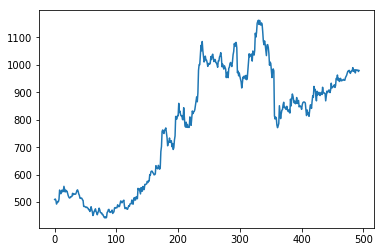

In [18]:
df['Close Price'].plot()
plt.show()